![numsol](img/numsol.png)

![numsol2](img/numsol2.png)

![alg](img/alg.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)
'''Метод численного решения внутренней задачи'''
#  шаг сетки мал по сравнению с масштабом изменения волновой функции

'''(*размерность*)'''
me = 9.1 * 10**-31                 #  (*кг*);
h = 1.05 * 10**-34                 #  (*Дж*сек*);
L = 1.5 * 10**-10                  #  (*м*);
qe = 1.6 * 10**-19                 #  (*Кл*);
E0 = h**2 / (2 * me * L**2 * qe)   #  (*эВ*);

In [2]:
'''(*задаем энергию*)'''
Emin = 0 * E0
Emax = 400 * E0

'''(*область движения*)'''
xmin = 0.01
xmax = 1.0
Nn = 100
delta = (xmax - xmin) / Nn

#  (*Потенциал*)
def V1(n):
    if (n >= 0) and (n <= Nn):
        return 100 * E0 * ((n - Nn / 2) / (Nn / 2))**2


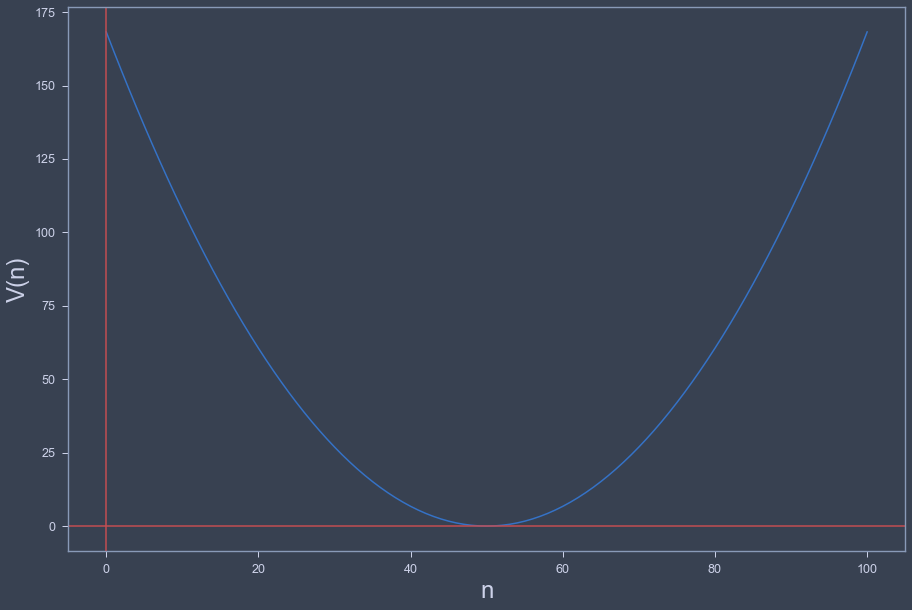

In [3]:
plt.figure(figsize=(15, 10))
plt.plot([n for n in range(Nn + 1)], [V1(n) for n in range(Nn + 1)])
plt.ylabel('V(n)', fontsize=24)
plt.xlabel('n', fontsize=24)
plt.axhline(y = 0, color="r")
plt.axvline(0, color="r")
plt.show()

In [4]:
def T(Et):
    
    k = Et**0.5
    R = []
    Psi = []
    def U(n):
        return -2 + delta**2 * (Et - V1(delta * n))
    
    
    R = [0] * (Nn - 1)
    Psi = [0] * Nn
    R[Nn - 2] = -(1 / (U(Nn) / 2 + 1j * k * delta))
    
    for m in range(1, Nn - 1):
        R[Nn - m - 2] = -(1 / (U(Nn - m) + R[Nn - m - 1]))
        
    Psi[0] = (2 * 1j * k * delta) / (R[0] + (U(0) / 2 + 1j * k * delta))
    for i in range(0, Nn - 1):
        Psi[i + 1] = R[i] * Psi[i]
    Tt = abs(Psi[Nn - 1])**2
    return Tt


def R(Et):
    
    k = Et**0.5
    R = []
    Psi = []
    def U(n):
        return -2 + delta**2 * (Et - V1(delta * n))
    
    
    R = [0] * (Nn - 1)
    Psi = [0] * Nn
    R[Nn - 2] = -(1 / (U(Nn) / 2 + 1j * k * delta))
    
    for m in range(1, Nn - 1):
        R[Nn - m - 2] = -(1 / (U(Nn - m) + R[Nn - m - 1]))
        
    Psi[0] = (2 * 1j * k * delta) / (R[0] + (U(0) / 2 + 1j * k * delta))
    for i in range(0, Nn - 1):
        Psi[i + 1] = R[i] * Psi[i]
    Rr = -1 + abs(Psi[0])**2
    return Rr

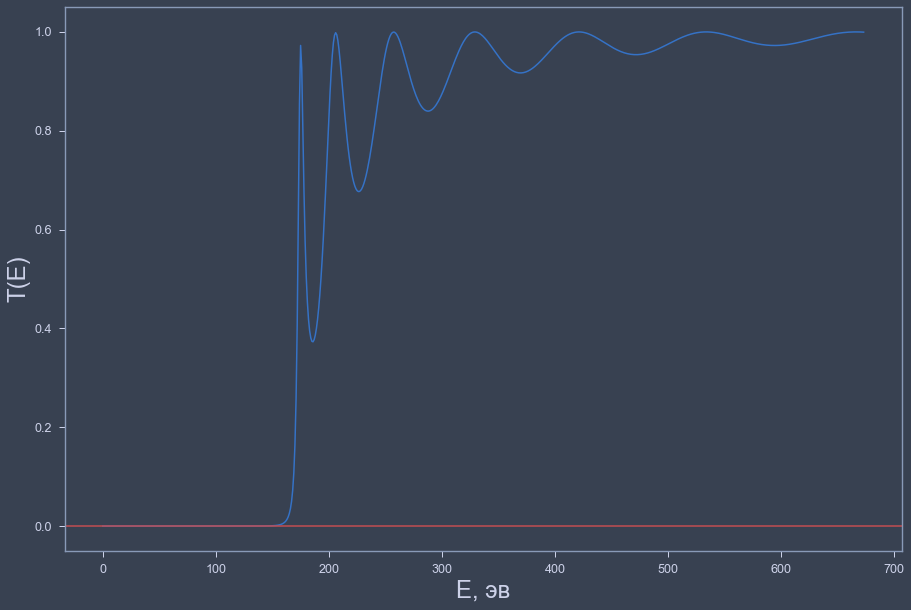

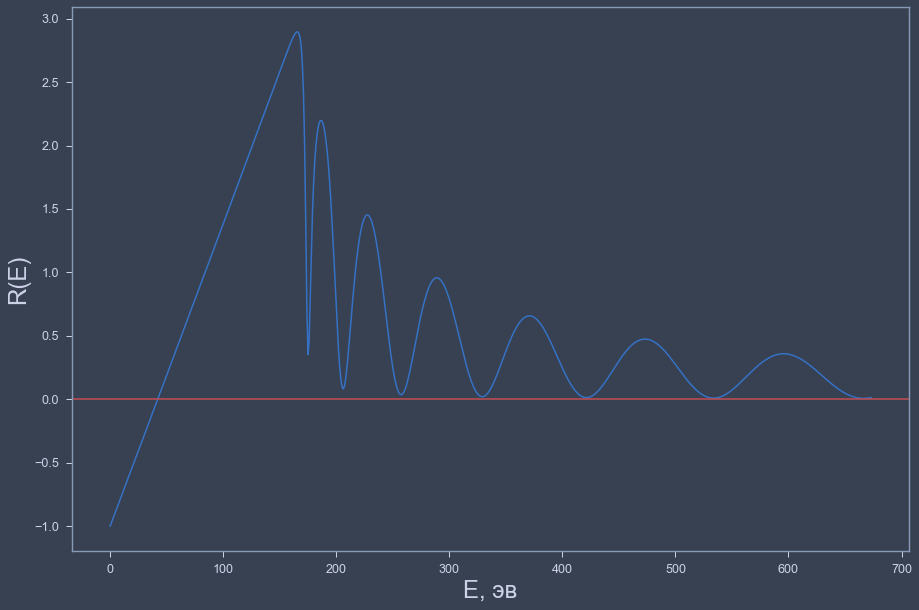

In [5]:
Et = np.arange(Emin, Emax)
Et.shape
plt.figure(figsize=(15, 10))
plt.plot(Et, T(Et))
plt.ylabel('T(E)', fontsize=24)
plt.xlabel('E, эв', fontsize=24)
plt.axhline(y = 0, color="r")
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(Et, R(Et))
plt.ylabel('R(E)', fontsize=24)
plt.xlabel('E, эв', fontsize=24)
plt.axhline(y = 0, color="r")
plt.show()

In [6]:
'''Wave function'''

Vm = 70


def V2(x):
    if abs(x - 0.5) <= 0.4:
        return Vm / 2 * (0.5 - x)**2
    else:
        return 0

def Wave(en):
    
    e = en * E0
    Nl = 25
    Nm = 20
    Nr = 5
    k = en**0.5
    d =  1 / Nm
    w = []
    pt = []
    et = []
    
    for i in range(-Nl, Nm + Nr):
        pt.append([i, V2(d * i)])
        
    for i in range(-Nl, Nm + Nr):
        et.append([i, V2(0.1 * i)])
    
    
    def U(n):
        return -2 + d**2 * (e - V2(d * n))
    
    
    R = [0] * (Nm - 1)
    psi = [0] * Nm
    R[Nm - 2] = -1 / (U(Nm) / 2 + 1j * k * d)
    
    i = Nm
    while i >= 0:
        R[i - 3] = - 1 / (U(i - 1) + R[i - 2])
        i = i - 1
    
    psi[0] = 2 * 1j * k * d / (R[0] + U(0) / 2 + 1j * k * d)
    
    for j in range(Nl - 1):
        w.append([-Nl + j, abs(np.exp(1j * k * d * (-Nl + j)) + \
             -1.0 + psi[0] * np.exp(-1j * k * d * (-Nl + j)))**2])
    for i in range(Nm - 1):
        psi[i + 1] = R[i - 1] * psi[i]
    for i in range(Nm):
        w.append([i, abs(psi[i])**2])
    for i in range(Nm + 1, Nm + Nr):
        w.append([i, abs(psi[Nm - 1] * np.exp(1j * k * d * (i - Nm)))**2])
    ener = np.arange(-Nl, Nm + Nr, len(w))
    x = np.linspace(-Nl, Nm + Nr)
    ww = interpolate.interp1d(ener, w)
    f = ww(ener)
    return f

In [8]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def magic(ener):
    Nl = 25
    Nm = 20
    Nr = 5


    xnew = []
    for i in range(len(Wave(ener))):
        xnew.append(Wave(ener)[i][0])
    #print(xnew)

    ynew = []
    for i in range(len(Wave(ener))):
        ynew.append(Wave(ener)[i][1])
    #print(ynew)

    v = []
    for i in xnew:
        v.append(V2(i/Nm))

    plt.figure(figsize=(15, 10))
    plt.plot(xnew, ynew)
    plt.plot(xnew, v)
    plt.ylabel('R(E)', fontsize=24)
    plt.xlabel('E, эв', fontsize=24)
    plt.axhline(y = ener, color="r")
    plt.show()


interactive_plot = interactive(magic, ener=(0, 15, 0.1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=7.0, description='ener', max=15.0), Output()), _dom_classes=('widget-i…

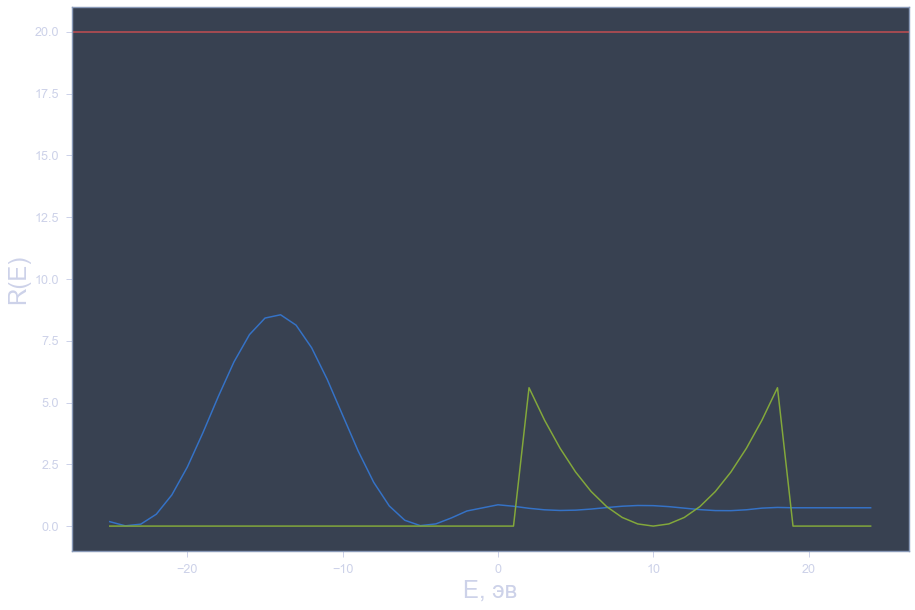

In [14]:
ener = 20
Nl = 25
Nm = 20
Nr = 5
xnew = []
for i in range(len(Wave(ener))):
    xnew.append(Wave(ener)[i][0])
#print(xnew)

ynew = []
for i in range(len(Wave(ener))):
    ynew.append(Wave(ener)[i][1])
#print(ynew)

v = []
for i in xnew:
    v.append(V2(i/Nm))
        
plt.figure(figsize=(15, 10))
plt.plot(xnew, ynew)
plt.plot(xnew, v)
plt.ylabel('R(E)', fontsize=24)
plt.xlabel('E, эв', fontsize=24)
plt.axhline(y = ener, color="r")
plt.show()